In [2]:
from bs4 import BeautifulSoup

import requests
import json

In [1]:
# # URL = "https://www.amazon.com/Thing-Around-Your-Neck/dp/0307455912"
# URL = "https://www.kaggle.com/kingburrito666/shakespeare-plays"
# res = requests.get(URL)
# # if res.status_code == 200:
# soup = BeautifulSoup(res.text, "html.parser")
# for a in soup.select("script"):
#     print(a.attrs)

TO BE EDITED: CHECK MARKING SCHEME FOR GUIDE
NOTE: The book was provided by the Women of Dartmouth Organisation in PDF format: http://women.dartmouth.org/s/1353/images/gid294/editor_documents/events/new_york_book_club/chimamanda-ngozi-adichie-the-thing-around-your.pdf?gid=294&pgid=61&sessionid=e00835ee-096b-499d-a6a2-3239cec2adf2&cc=1.
To organise the data for analysis, the contents of the PDF were transferred to text format and then, the stories were separated into individual text files.

In [124]:
# Create a list to store all 12 stories.
stories = [""] * 12


def importStories(storyPath, storyPos):
    
    # Open the file in a read format.
    f = open(storyPath, encoding="utf8")

    # Read the contents of the file.
    stories[storyPos] = f.read()

    # Close the object since we've finished our operation and don't have to keep it in memory.
    f.close()

    
# For error handling
import sys

try:
    # Add all stories to stories list.
    importStories("Data/1.Cell_One.txt", 0); # Cell One
    importStories("Data/2.Imitation.txt", 1); # Imitation
    importStories("Data/3.A_Private_Experience.txt", 2); # A Private Experience
    importStories("Data/4.Ghosts.txt", 3); # Ghosts
    importStories("Data/5.On_Monday_of_Last_Week.txt", 4); # On Monday of Last Week
    importStories("Data/6.Jumping_Monkey_Hill.txt", 5); # Jumping Monkey Hill
    importStories("Data/7.The_Thing_Around_Your_Neck.txt", 6); # The Thing Around Your Neck
    importStories("Data/8.The_American_Embassy.txt", 7); # The American Embassy
    importStories("Data/9.The_Shivering.txt", 8); # The Shivering
    importStories("Data/10.The_Arrangers_of_Marriage.txt", 9); # The Arrangers of Marriage
    importStories("Data/11.Tomorrow_Is_Too_Far.txt", 10); # Tomorrow Is Too Far
    importStories("Data/12.The_Headstrong_Historian.txt", 11); # The Headstrong Historian
except:
    print("Oops!", sys.exc_info()[1], ".", "\nPlease confirm file path and try again.")

In [125]:
import nltk
import matplotlib.pyplot as plt

def plotWordFreq(stories, wordCount, storyTitle=""):
    # Join lists
    allStories = []
    for story in stories:
        allStories += story
        
    # Get frequency distribution of words
    freqDist = nltk.FreqDist(allStories)
    
    # Plot frequency distribution of words
    plt.figure(figsize=(20,3))
    
    plt.title(storyTitle)
    freqDist.plot(wordCount)

In [126]:
from nltk.tokenize import word_tokenize

tokens = []
for story in stories:
    words = word_tokenize(story)
    tokens.append(words)

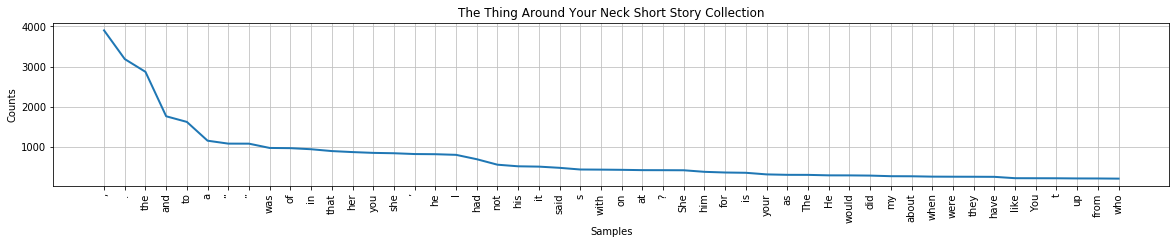

In [127]:
plotWordFreq(tokens, 50, "The Thing Around Your Neck Short Story Collection")

## Removing Punctuation Marks

In [128]:
nopunct_tokens = []
for char in tokens:
    nopunct = [word for word in char if word.isalpha()]
    nopunct_tokens.append(nopunct)

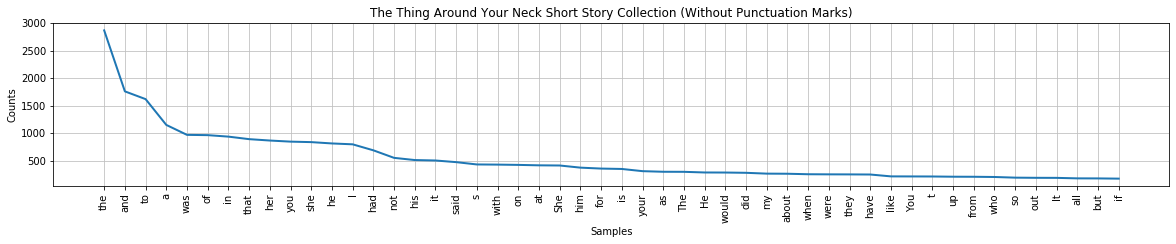

In [129]:
plotWordFreq(nopunct_tokens, 50, "The Thing Around Your Neck Short Story Collection (Without Punctuation Marks)")

* Notice that even after removing punctuations, our frequency distribution graph is riddled by words that, though most frequent, do not give us much meaning. These words are called stopwords and must be removed before we can start to gain any meaningful insight.

## Removing Stopwords

* Download stopwords resource

In [130]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Brenda
[nltk_data]     Akoda\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

* Apply stopwords resource to all stories

In [131]:
from nltk.corpus import stopwords

stop_words = stopwords.words("english")
nostopwords_tokens = []
for char in nopunct_tokens:
    cleaned = [word for word in char if not word in stop_words]
    nostopwords_tokens.append(cleaned)

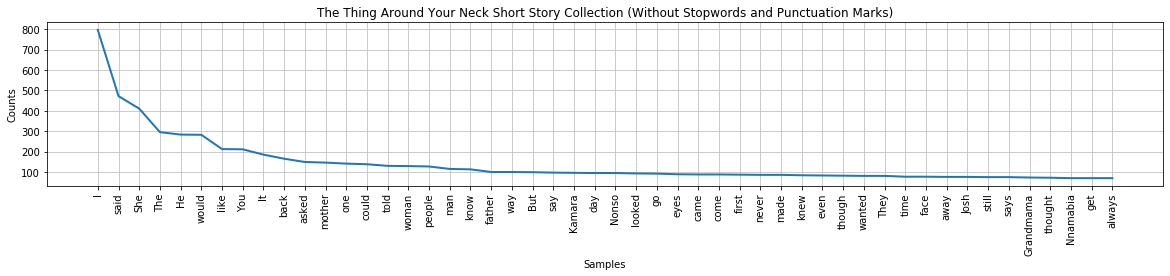

In [132]:
plotWordFreq(nostopwords_tokens, 50, "The Thing Around Your Neck Short Story Collection (Without Stopwords and Punctuation Marks)")

# FIRST INSIGHT: THE IMPORTANCE OF THE FIRST PERSON AND FEMALE POINT OF VIEW
By removing punctuation marks and stopwords, we can view a pattern that cuts across Adichie's works: the importance of pronouns such as "He", "She" and "I".

However, we can also observe that while the pronoun "He" occurs nearly 300 times, the pronoun "She" occurs about 100 times more. This information could imply that stories that focus more on female characters are more likely to become masterpieces. Alternatively, considering that the author identifies as female, it could instead imply that authors are more likely to be successful at producing masterpiece short stories if the majority of the characters that they create are most like them as they are then more easily able to tell stories that portray authentic experiences.

On the other hand, the pronoun "I" can be observed to be the most frequent word across Adichie's short stories. This observation could be tied to the former, but it provides us with our more conclusively and perhaps most important first insight that: 
#### A short story is more likely to become a masterpiece if it is told from a first person point of view.

## Formatting text to lowercase and removing pronouns
While we were successful in removing punctuation marks and stopwords from our stories, the pronouns that were still evident were capitalised and as such were not removed by the stopwords resource. While this issue allowed us to gain our first insight, i.e. the importance of different points of view which is an important aspect of any literary work, we would most likely gain even more insight if we strip our stories of these words to examine the actions of our characters and the presence of other nouns.

In [133]:
# Formatting all words to lowercase.
lowercase_tokens = []
for char in nostopwords_tokens:
    cleaned = [word.lower() for word in char]
    lowercase_tokens.append(cleaned)
    
# Removing the formerly capitalised pronouns.
stop_words = stopwords.words("english")
nostopwords_tokens = []
for char in lowercase_tokens:
    cleaned = [word for word in char if not word in stop_words]
    nostopwords_tokens.append(cleaned)

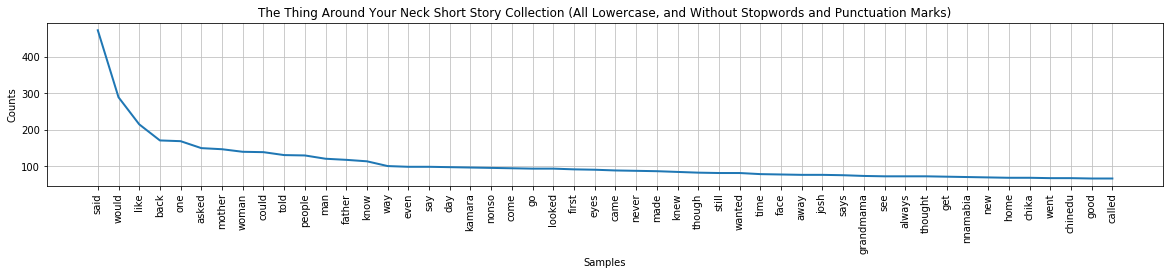

In [134]:
plotWordFreq(nostopwords_tokens, 50, "The Thing Around Your Neck Short Story Collection (All Lowercase, and Without Stopwords and Punctuation Marks)")

# SECOND INSIGHT: THE IMPORTANCE OF DIALOGUE
Upon removing punctuation marks and stopwords, including pronouns, we can now arrive at our second insight concerning how authors can produce a short story masterpiece: 
### The story needs to have a lot of dialogue to clue readers into what is going on. 

This is evident from the high frequency of the word "said" (nearly 500 occurrences).
Also note the words "asked", "told" and "called" which are also indicative of dialogue.

NOTE: It is important to also point out that using our tokenisation technique, it is difficult to know the pronoun which accompanied the word "said" most as it could have been "I said", "She said", or "He said". Thus, if furthering our research to gain more insight into who should speak more in a short story, we would tokenise our stories into two words instead of one so that we get to see the frequency distribution between "I said", "She said" and "He said" and make a more informed conclusion about who should have the most say in a short story.

## Applying Two Approaches of Stemming and Lemmatization to variations of the word "say" to derive its root

Although the high occurrence of the word "said" supports our second insight, notice that "say" which appears as the 17th most common word is grammatically the same as "said" regarding the action that it carries out; the same observation can be made with the word "says" in 37th position. Hence, by applying a stemmer such as Porter's stemmer or ..., or by applying Lemmatization, we can then consider all variations of the word "say" and thus, the importance of this insight would be more obvious. 

IMPORTANCE OF STORIES CENTERED AROUND FAMILY OR THE IMPORTANCE OF FAMILY IN AFRICAN STORY TELLING
Cite prevalence of "mother", "woman", "people", "man", "father", "grandmama" and "home"

Mention how mother and woman is most populous which is indicative of the highly important role that they play in the character's life.
Stories that readers can relate to as no human is an island, but is connected to other humans.

The importance of the human gaze...?